In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

this will be done through the recently learned gillepsie method, the steps are:
1 - calculate the propensities through K_state*(number of ocupants of the state) and the sum
2 - generate two random numbers r1 and r2, and use them to select the next event and which time will it occur
3 - update the system, record the full state and then repeat it all again.

of course, we begin by selecting the starting conditions of the event


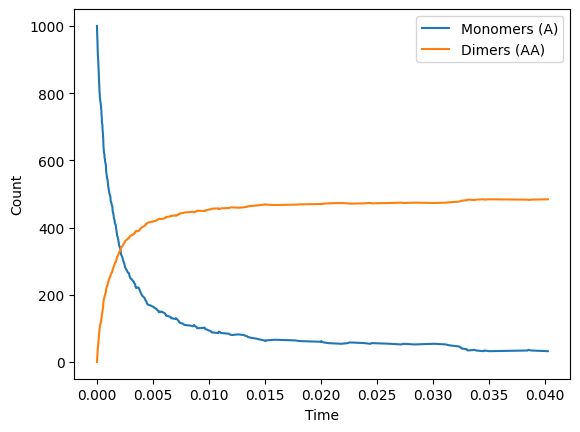

In [11]:
t_i = 0.0  #starting time
t_f = 0.04 #finishing time

n_mono = 1000 #number of monomers
n_di = 0 #number of dimers

k_plus = 1.0   # A + A -> AA rate
k_minus = 1.0  # AA -> A + A rate

#record values
time = [t_i]
N_A = [n_mono]
N_AA = [n_di]

t = t_i
while t < t_f:
    #calculate the propensities
    p_A = k_plus*(n_mono/2)*(n_mono-1)
    p_AA = k_minus*(n_di)
    p_0 = p_A+p_AA

    r1 = np.random.rand()
    r2 = np.random.rand()

    tau = (1/p_0)*math.log(1/r1)

    if r2 < p_A/p_0:
        n_mono -= 2
        n_di += 1
    else:
        n_di -= 1
        n_mono += 2
    
    t += tau
    time.append(t)
    N_A.append(n_mono)
    N_AA.append(n_di)

plt.plot(time, N_A, label='Monomers (A)')
plt.plot(time, N_AA, label='Dimers (AA)')
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend()
plt.show()